In [4]:
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
import pandas as pd
import matplotlib.ticker as mticker
import datetime

In [5]:
# plt.style.use(['science','nature','no-latex'])
plt.style.use(['science','nature','no-latex'])

FIGSIZE=(6,5)
TITLE_SIZE = 14

In [6]:
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

# Figure 2. MAG, with disruption index

In [7]:
import svgutils.compose as sc
from IPython.display import SVG

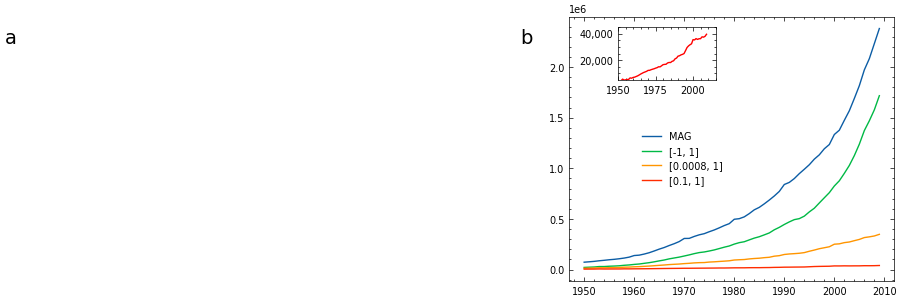

In [8]:
# MAX_EPISODES = 30
df = pd.read_csv('./data/figure_2.csv')
df = df[df['year']<=2009]

data_titles = ["MAG","[-1, 1]","[0.0008, 1]","[0.1, 1]"]
x_axis_data = df['year']

# fig, ax = plt.subplots(1, 1,figsize=FIGSIZE)

plt.close('all')
fig = plt.figure(figsize=(9, 3), constrained_layout=True)
spec = fig.add_gridspec(1, 9)

ax1 = fig.add_subplot(spec[0, :5])
ax2 = fig.add_subplot(spec[0, 5:])

# fig, ax = plt.subplots(1, 1,figsize=(4,3))

for title in data_titles:
    ax2.plot(x_axis_data,df[title],label=title)

#I want to select the x-range for the zoomed region. I have figured it out suitable values
# by trial and error. How can I pass more elegantly the dates as something like
x1 = 2000
x2 = 2010

# select y-range for zoomed region
y1 = 10000
y2 = 50000

# Make the zoom-in plot:
# axins = zoomed_inset_axes(ax, 4, loc=6) # zoom = 2
# axins = inset_axes(ax, width=2, height=1, loc=2)
axins = ax2.inset_axes([0.15,0.76,0.30,0.2])

axins.plot(x_axis_data,df["[0.1, 1]"],"r")

x1 = 1950
x2 = 2015
y1 = 5000
y2 = 45000

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
# axins.set_xticklabels([])
# axins.set_yticklabels([])

# ax.indicate_inset_zoom(axins)
# mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
mark_inset(ax2, axins, loc1=3, loc2=2, fc="none")

ax2.legend(loc=0, bbox_to_anchor=(0, 0.1, 0.5, 0.5))

ax2.text(-0.15,0.9,'b',transform=ax2.transAxes).set_size(TITLE_SIZE)

# ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))

ax1.text(-0.25,0.9,'a',transform=ax1.transAxes).set_size(TITLE_SIZE)
ax1.axis("off")
# ax1.relim()

fig.savefig("figure-1.svg",dpi=300)

# sc.Figure("8cm", "8cm", 
#     sc.Panel(sc.SVG("./disruption.svg").scale(0.003).move(-2,5)),
#     sc.Panel(sc.SVG("figure-1.svg"))
#     ).save("compose.svg")
# SVG('compose.svg')

In [9]:
df[df['year']<=2010]

,year,MAG,"[-1, 1]","[0.0008, 1]","[0.1, 1]"
0,1950,72330,20628,12296,3986
1,1951,76208,22886,13618,4243
2,1952,80431,24932,14336,4468
3,1953,86320,29228,17258,5675
4,1954,90949,29417,16671,4950
5,1955,96418,32438,18123,5146
6,1956,100574,34240,19014,5382
7,1957,106300,36836,20025,5440
8,1958,113095,41701,22933,6609
9,1959,122337,45226,24081,6354


In [10]:
import svgutils.transform as sg
from svgutils.compose import Unit


ovWdth = Unit('33cm')
ovHght = Unit('11cm')

fig = sg.SVGFigure(ovWdth, ovHght)
# fig = sg.SVGFigure("26cm", "46.5cm")

# load matpotlib-generated figures
fig1 = sg.fromfile('disruption.svg')
fig2 = sg.fromfile('figure-1.svg')
fig3 = sg.fromfile('formular.svg')

# get the plot objects
plot1 = fig1.getroot()
plot2 = fig2.getroot()
plot3 = fig3.getroot()
plot1.moveto(1, 1.5, scale_x=0.0095,scale_y=0.0095)
plot2.moveto(0, 0, scale_x=0.05,scale_y=0.05)
plot3.moveto(4.8, 9.4, scale_x=0.0007,scale_y=0.0007)

# add text labels
# txt1 = sg.TextElement(25,20, "A", size=12, weight="bold")
# txt2 = sg.TextElement(305,20, "B", size=12, weight="bold")

# append plots and labels to figure
fig.append([plot2, plot1,plot3])
# fig.append([txt1, txt2])

# save generated SVG files
fig.save("compose.svg")
fig.save("compose.png")
SVG('compose.svg')

In [11]:
import svgutils.transform as sg
from svgutils.compose import Unit

ovWdth = Unit('14cm')
ovHght = Unit('8cm')

fig = sg.SVGFigure(ovWdth, ovHght)
fig.get_size()
# fig2.get_size()

('14.0cm', '8.0cm')

In [12]:
data_1200 = [
 {
     "name":"C-1200",
     "xy":[5,7],
     "radius":4,
     "color":"b",
     "alpha":0.3
 },
 {
     "name":"D-1200",
     "xy":[8,2.1],
     "radius":4,
     "color":"g",
     "alpha":0.3
 },
 {
     "name":"E-1200",
     "xy":[1,2],
     "radius":4,
     "color":"r",
     "alpha":0.3
 }
]

data_cover = {
    "CD": "5.58%",
    "CE": "16.8%",
    "DE": "3.3%",
}
class WTD:
    def __init__(self, data,data_cover, ax):
        self.data = data
        self.data_cover = data_cover
        self.ax = ax
    
    def draw(self):
        # self.ax.set_title('a',loc='left').set_size(TITLE_SIZE)
        
        self.ax.text(-0.21,0.8,'c',transform=self.ax.transAxes).set_size(TITLE_SIZE)
        for item in self.data:
            circ = plt.Circle(item['xy'], item['radius'], color=item['color'],alpha=item['alpha'])
            self.ax.add_patch(circ)
            self.ax.text(item['xy'][0], item['xy'][1], item['name'], fontsize=8,ha="center")

        for i in range(len(self.data)):
            for j in range(i+1,len(self.data)):
                # middle point
                x1,x2,y1,y2 = self.data[i]['xy'][0],self.data[j]['xy'][0],self.data[i]['xy'][1],self.data[j]['xy'][1]
                xm = round((x1 + x2)/2,4)
                ym = round((y1 + y2)/2,4)
                # self.ax.plot([xm], [ym], 'o')
                
                # vertical
                k = (x1-x2)/(y2-y1)
                atan = math.atan(k)
                Angle = math.radians(math.degrees(atan))
                
                length = 5
                xc = round(length * math.cos(Angle), 4)
                yc = round(length * math.sin(Angle), 4)

                X_A,Y_A = xm + xc,ym + yc
                X_B,Y_B = xm - xc,ym - yc
              
                # 判断较远的点
                for item in self.data:
                    if item['name'] != self.data[i]['name'] and item['name'] != self.data[j]['name']:
                        if math.dist((X_A,Y_A), item['xy']) < math.dist((X_B,Y_B), item['xy']):
                            X_A,Y_A = X_B,Y_B
                key = f"{self.data[i]['name'][0]}{self.data[j]['name'][0]}"
                self.ax.annotate(self.data_cover[key], xy=(xm, ym), xytext=(X_A, Y_A),size=8,
                    arrowprops=dict(facecolor='black',arrowstyle="->",
                            connectionstyle="arc3"),
                                 horizontalalignment='center')

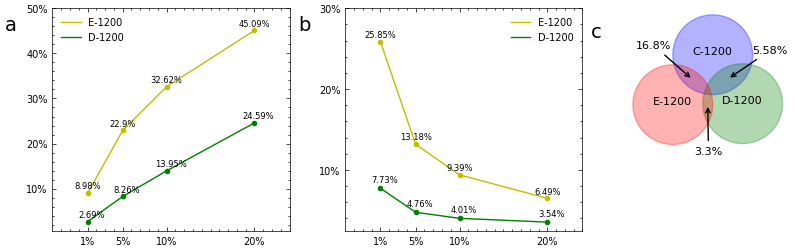

In [13]:
import math

# MAX_EPISODES = 30
df = pd.read_csv('./data/figure_3-4.csv')

data_titles = ["W-1","D-1","W-2","D-2"]
x_axis_data = df['X']

# fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(6,4))

# layout
plt.close('all')
fig = plt.figure(figsize=(8, 2.5), constrained_layout=True)
spec = fig.add_gridspec(3, 11)

ax1 = fig.add_subplot(spec[0:3, 0:4])
ax2 = fig.add_subplot(spec[0:3, 4:8])
ax3 = fig.add_subplot(spec[0:2, 8:],aspect="equal")

ax1.plot(x_axis_data,df["W-1"],label="E-1200",color='y')
ax1.plot(x_axis_data,df["D-1"],label="D-1200",color='g')
ax1.scatter(x_axis_data,df["W-1"],color='y')
ax1.scatter(x_axis_data,df["D-1"],color='g')
ax1.set_xlim(-3, 24)
ax1.set_xticks([1,5,10,20])
ax2.set_xlim(-3, 24)
ax2.set_xticks([1,5,10,20])

for i in range(len(df["W-1"])):
    ax1.annotate(f'{df["W-1"][i]}%', (x_axis_data[i], df["W-1"][i]),va="center", ha="center",xytext=(0,5), textcoords='offset points',size=6)
    ax1.annotate(f'{df["D-1"][i]}%', (x_axis_data[i], df["D-1"][i]),va="center", ha="center",xytext=(3,5), textcoords='offset points',size=6)
    ax2.annotate(f'{df["W-2"][i]}%', (x_axis_data[i], df["W-2"][i]),va="center", ha="center",xytext=(0,5), textcoords='offset points',size=6)
    ax2.annotate(f'{df["D-2"][i]}%', (x_axis_data[i], df["D-2"][i]),va="center", ha="center",xytext=(3,6), textcoords='offset points',size=6)

ax2.plot(x_axis_data,df["W-2"],label="E-1200",color='y')
ax2.plot(x_axis_data,df["D-2"],label="D-1200",color='g')
ax2.scatter(x_axis_data,df["W-2"],color='y')
ax2.scatter(x_axis_data,df["D-2"],color='g')

ax1.set_yticks([10,20,30,40,50])
ax2.set_yticks([10,20,30])
# ax2.set_yticklabels([])
# axins.set_yticklabels([])

ax1.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
ax1.xaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
ax2.xaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

# ax1.set_ylabel('交集占120万比例')
# ax1.set_xlabel('top percentile of C-top')
# ax2.set_xlabel('top percentile of C-top')
# ax1.set_ylabel(' a')
# ax2.set_ylabel(' ')

ax1.text(-0.20,0.9,'a',transform=ax1.transAxes).set_size(TITLE_SIZE)
ax2.text(-0.20,0.9,'b',transform=ax2.transAxes).set_size(TITLE_SIZE)


# ax.set_title('Transistor density').set_size(20)
ax1.legend(loc='best')
ax2.legend(loc='best')
# fig.savefig("tmp.svg")

wtd = WTD(data_1200,data_cover,ax3)
wtd.draw()

ax3.axis("off")
ax3.relim()
ax3.autoscale_view()

fig.savefig("figure-2.svg",dpi=300)

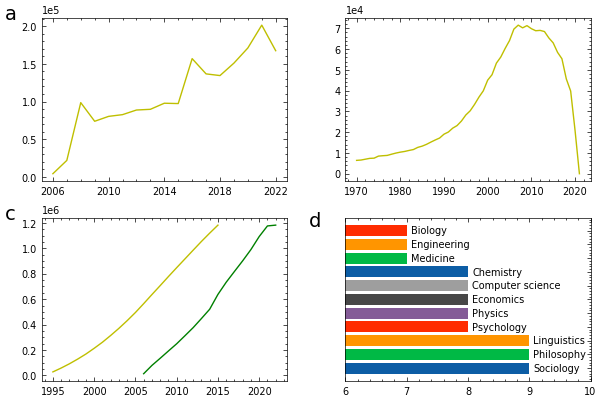

In [80]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter()
formatter.set_scientific(True)
formatter.set_useOffset(True)
# formatter.set_useMathText(True)
formatter.set_powerlimits((1,2))

# chart3
dfs = []
for i in range(4):
    df = pd.read_csv(f'./data/chart3_{i}.csv')
    dfs.append(df)
Titles = ['a','b','c','d']
colors = ['y','g']

plt.close('all')
fig = plt.figure(figsize=(6, 4), constrained_layout=True)
spec = fig.add_gridspec(2, 41)

ax3 = fig.add_subplot(spec[1, 21:])
axs = [fig.add_subplot(spec[0, :20]),fig.add_subplot(spec[0, 21:]),fig.add_subplot(spec[1, :20]),ax3]

# 2023-06-28 replace by chart3_0-v1.csv
dfs[0] = pd.read_csv(f'./data/chart3_0-v1.csv')

# chart 0
# months = []
# for item in dfs[0]['year']:
#     d = datetime.datetime(item//100,item%100,1)
#     months.append(d)

colors_robin = 0
# for col_name in dfs[0].columns.tolist():
#     if col_name != "year":
#         axs[0].plot(months,dfs[0][col_name],label=col_name,color=colors[colors_robin])
#         colors_robin+=1
axs[0].plot(dfs[0]['year'],dfs[0]['dx'],label='dx',color=colors[colors_robin])
        
# axs[0].legend(loc='best')
axs[0].text(-0.15,0.99,Titles[0],transform=axs[0].transAxes).set_size(TITLE_SIZE)
# axs[0].set_xlim(2006,2023)
axs[0].set_xticks(np.arange(2006, 2023, step=4),)
axs[0].yaxis.set_major_formatter(formatter)

# chart b

dfs[1] = pd.read_csv(f'./data/chart3_1-v1.csv')
axs[1].plot(dfs[1]['year'],dfs[1]['dx'],label="dx",color=colors[0])
axs[1].yaxis.set_major_formatter(formatter)

# axs[0].yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# chart 1,2
for i in range(2,3):
    colors_robin = 0
    for col_name in dfs[i].columns.tolist():
        if col_name != "year":
            axs[i].plot(dfs[i]['year'],dfs[i][col_name],label=col_name,color=colors[colors_robin])
            colors_robin+=1
            
    # axs[i].set_title(Titles[i],loc='left',pad=-20).set_size(TITLE_SIZE)
    
    axs[i].yaxis.set_major_formatter(formatter)
    # axs[i].yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
    axs[i].text(-0.15,0.99,Titles[i],transform=axs[i].transAxes).set_size(TITLE_SIZE)
    # axs[i].ticklabel_format(useOffset=False)
    # axs[i].legend(loc='best')

# chart 3
subject = ['Psychology','Philosophy','Physics','Biology','Chemistry','Sociology','Economics','Linguistics','Computer science','Engineering','Medicine']
datas = []
series = dfs[3].iloc[4]
for name in subject:
    datas.append(series[name])
    
datas, subject = zip(*sorted(zip(datas, subject),reverse=True))

for name,value in zip(subject,datas):
    rects1 = axs[3].barh(name, value,label=name)
    axs[3].bar_label(rects1,[name], padding=3,size=7)
    # axs[3].bar_label(rects1,[name], padding=3,size=7)
    # axs[3].barh(subject,datas)
    
# axs[3].barh(subject,datas)

axs[3].set_xlim(6,10)
# axs[3].legend(loc='best',prop={'size': 4})
axs[3].set_yticklabels([])
axs[3].text(-0.15,0.95,Titles[3],transform=axs[3].transAxes).set_size(TITLE_SIZE)

# plt.rcParams.update({'figure.autolayout': True})
# labels = axs[3].get_yticklabels()
# plt.setp(labels, rotation=45, horizontalalignment='right')

axs[3].yaxis.set_ticks_position('right')
axs[3].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# axs[3].bar(subject, datas)
# axs[3].

fig.savefig("figure-3.svg",dpi=300)

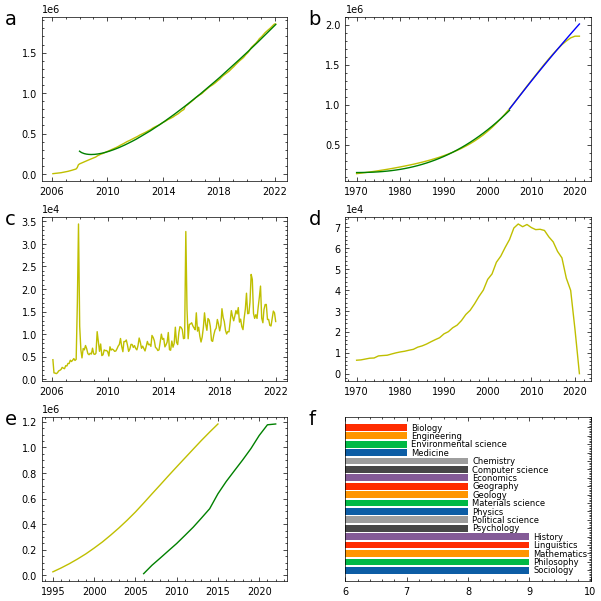

In [119]:
# 重构上图
# 依赖
from matplotlib import ticker
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%Y")

formatter = ticker.ScalarFormatter()
formatter.set_scientific(True)
formatter.set_useOffset(True)
# formatter.set_useMathText(True)
formatter.set_powerlimits((1,2))

# common set
colors = ['y','g','b']
plt.close('all')
fig = plt.figure(figsize=(6, 6), constrained_layout=True)
spec = fig.add_gridspec(3, 41)

# fig = plt.figure(figsize=(6, 4), constrained_layout=True)
# spec = fig.add_gridspec(2, 41)

ax_a = fig.add_subplot(spec[0, :20])
ax_b = fig.add_subplot(spec[0, 21:])
ax_c = fig.add_subplot(spec[1, :20])
ax_d = fig.add_subplot(spec[1, 21:])
ax_e = fig.add_subplot(spec[2, :20])
ax_f = fig.add_subplot(spec[2, 21:])

# chart a
df_a = pd.read_csv(f'./data/chart3_0.csv')
months = []
for item in df_a['year']:
    d = datetime.datetime(item//100,item%100,1)
    months.append(d)

colors_robin = 0
for col_name in df_a.columns.tolist():
    if col_name != "year":
        ax_a.plot(months,df_a[col_name],label=col_name,color=colors[colors_robin])
        colors_robin+=1
        
# ax_a.legend(loc='best')
ax_a.text(-0.15,0.95,'a',transform=ax_a.transAxes).set_size(TITLE_SIZE)
ax_a.xaxis.set_major_formatter(date_form)
ax_a.set_xticks([datetime.datetime(2006,1,1),datetime.datetime(2010,1,1),datetime.datetime(2014,1,1),datetime.datetime(2018,1,1),datetime.datetime(2022,1,1)])

# chart b
df_b = pd.read_csv(f'./data/chart3_1.csv')
df_d = pd.read_csv(f'./data/chart3_1-v1.csv')

ax_b.plot(df_b['year'],df_b['count'],label='count',color=colors[0])
ax_b.plot(df_b['year'],df_d['fitting_1'],label='fitting_1',color=colors[1])
ax_b.plot(df_b['year'],df_d['fitting_2'],label='fitting_2',color=colors[2])
ax_b.text(-0.15,0.95,'b',transform=ax_b.transAxes).set_size(TITLE_SIZE)

# chart c
df_c = pd.read_csv(f'./data/chart3_0-v2.csv')
months = []
for item in df_c['year']:
    d = datetime.datetime(item//100,item%100,1)
    months.append(d)

colors_robin = 0
for col_name in df_c.columns.tolist():
    if col_name != "year":
        ax_c.plot(months,df_c[col_name],label=col_name,color=colors[colors_robin])
        colors_robin+=1
ax_c.text(-0.15,0.95,'c',transform=ax_c.transAxes).set_size(TITLE_SIZE)
ax_c.yaxis.set_major_formatter(formatter)
ax_c.xaxis.set_major_formatter(date_form)
ax_c.set_xticks([datetime.datetime(2006,1,1),datetime.datetime(2010,1,1),datetime.datetime(2014,1,1),datetime.datetime(2018,1,1),datetime.datetime(2022,1,1)])

# chart d
df_d = pd.read_csv(f'./data/chart3_1-v1.csv')
ax_d.plot(df_d['year'],df_d['dx'],label="dx",color=colors[0])
ax_d.yaxis.set_major_formatter(formatter)
ax_d.text(-0.15,0.95,'d',transform=ax_d.transAxes).set_size(TITLE_SIZE)

# chart e
df_e = pd.read_csv(f'./data/chart3_2.csv')
colors_robin = 0
for col_name in df_e.columns.tolist():
    if col_name != "year":
        ax_e.plot(df_e['year'],df_e[col_name],label=col_name,color=colors[colors_robin])
        colors_robin+=1
ax_e.text(-0.15,0.95,'e',transform=ax_e.transAxes).set_size(TITLE_SIZE)

# chart f
df_f = pd.read_csv(f'./data/chart3_3.csv')
# subject = ['Psychology','Philosophy','Physics','Biology','Chemistry','Sociology','Economics','Linguistics','Computer science','Engineering','Medicine']
subject = ['Geology','Geography','Psychology','Philosophy','Mathematics','Physics','Biology','Chemistry','Sociology','Economics','Political science','Linguistics',
           'Computer science','History','Materials science','Engineering','Environmental science','Medicine']

datas = []
series = df_f.iloc[4]
for name in subject:
    datas.append(series[name])
    
datas, subject = zip(*sorted(zip(datas, subject),reverse=True))

for name,value in zip(subject,datas):
    rects1 = ax_f.barh(name, value,label=name)
    ax_f.bar_label(rects1,[name], padding=3,size=6)
    
ax_f.set_xlim(6,10)
ax_f.set_yticklabels([])
ax_f.text(-0.15,0.95,"f",transform=ax_f.transAxes).set_size(TITLE_SIZE)

ax_f.yaxis.set_ticks_position('right')
ax_f.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

fig.savefig("figure-3.svg",dpi=300)

In [105]:
np.arange(200600, 202300, step=400)

14

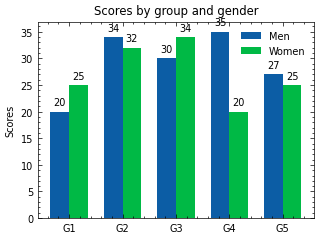

In [16]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()